<a href="https://colab.research.google.com/github/ViruniRuvinya/Customer-Segmentation-clustering/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Dependecies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
#load dataset
dataset=pd.read_csv('/content/Mall_Customers (1).csv')
df=dataset.copy()
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

### Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### EDA

<ipython-input-6-fca1e72775c1>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],bins=20)
<ipython-input-6-fca1e72775c1>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],bins=20)
<ipython-input-6-fca1e72775c1>:8: UserWarning: 

`distplot` is a deprecated function and will be removed i

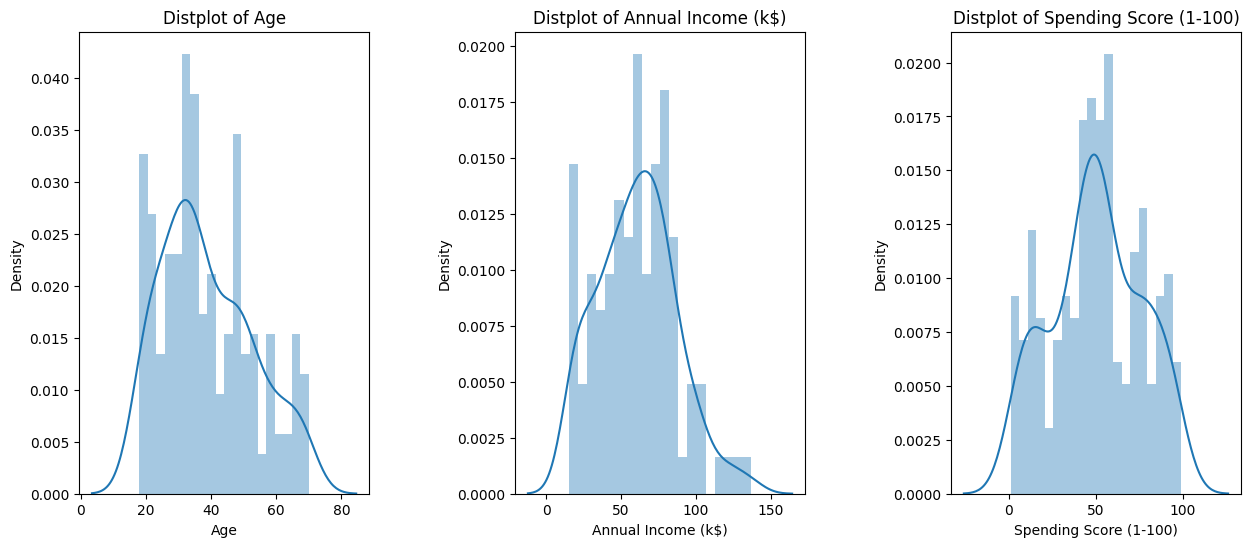

In [ ]:
plt.figure(1,figsize=(15,6))
n=0

for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.distplot(df[x],bins=20)
  plt.title('Distplot of {}'.format(x))

plt.show()

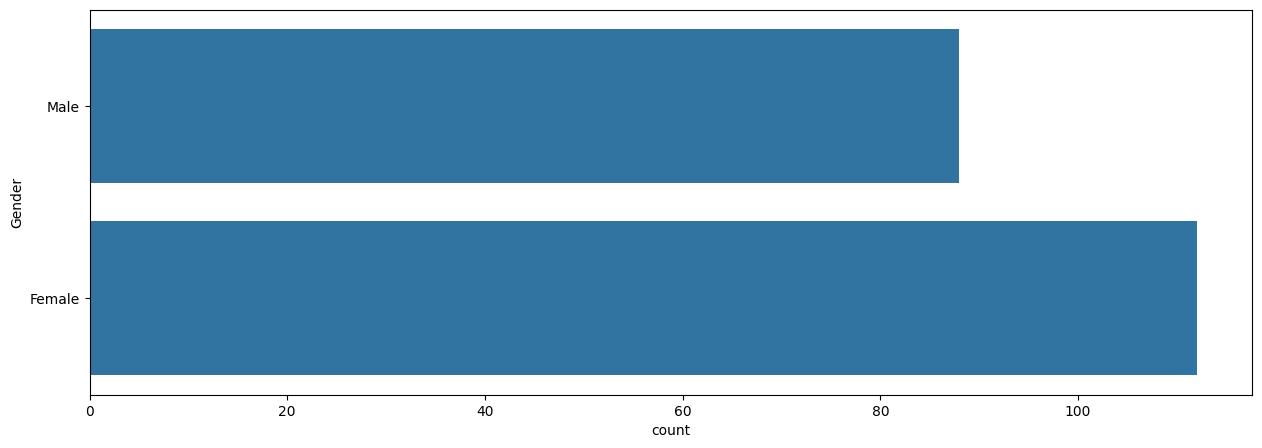

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.show()

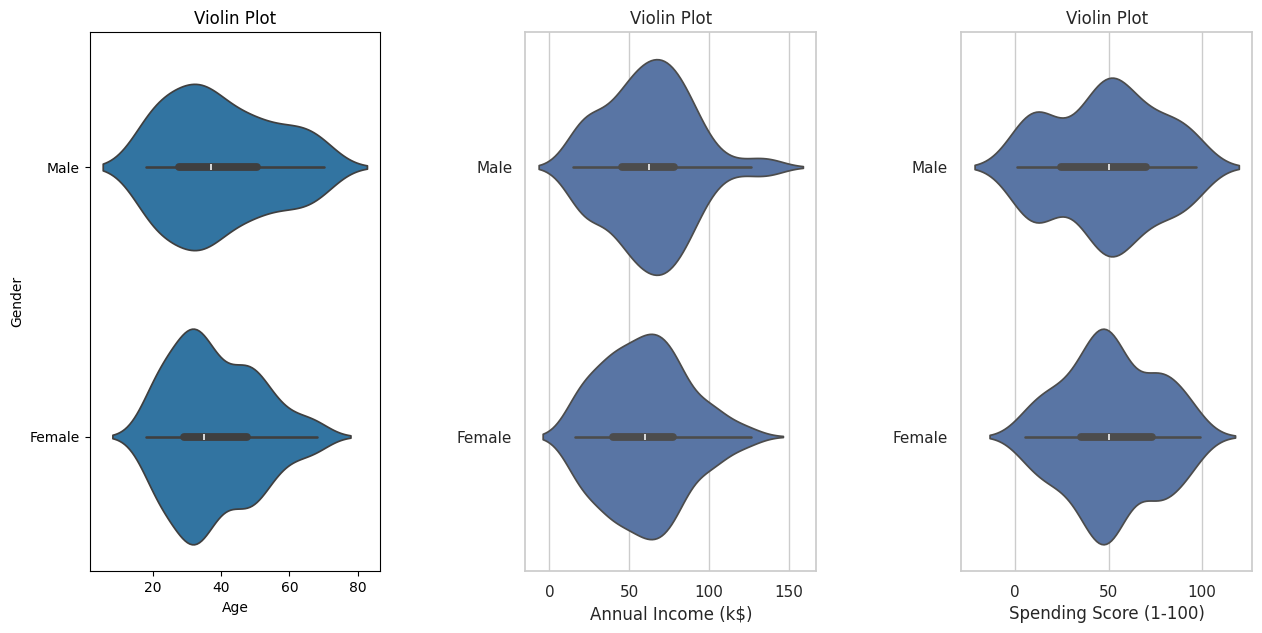

In [ ]:
plt.figure(1,figsize=(15,7))
n=0

for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  sns.set(style="whitegrid")
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x=cols,y='Gender',data=df)
  plt.title('Violin Plot')
  plt.ylabel('Gender' if n==1 else '')
plt.show()

<ipython-input-9-7494504dcc1f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex,y=agey,palette='mako')


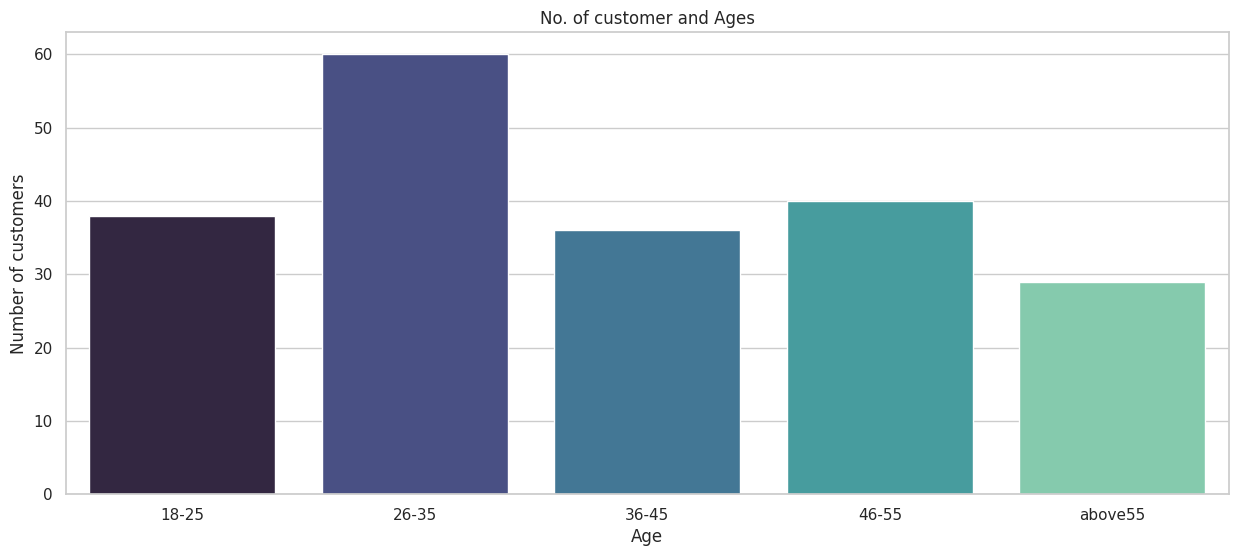

In [ ]:
#dividing data into different age groups
age_18_25=df.Age[(df.Age >=18)&(df.Age <=25)]
age_26_35=df.Age[(df.Age >=26)&(df.Age <=35)]
age_36_45=df.Age[(df.Age >=36)&(df.Age <=45)]
age_45_55=df.Age[(df.Age >=45)&(df.Age <=55)]
age_55above=df.Age[df.Age >=56]

agex=['18-25','26-35','36-45','46-55','above55']
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_45_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey,palette='mako')
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.title('No. of customer and Ages')
plt.show()

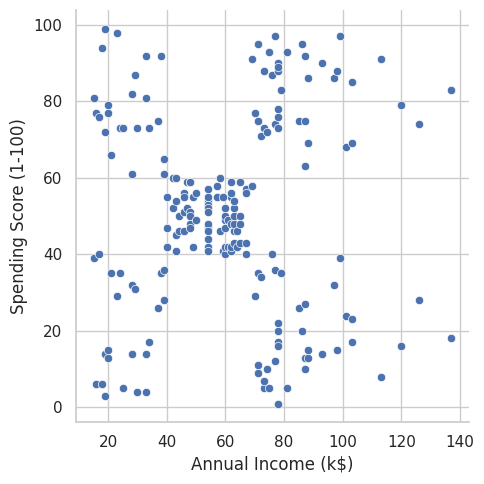

In [ ]:
#relationship between annual income and spending score
sns.relplot(x="Annual Income (k$)",y='Spending Score (1-100)',data=df)

<ipython-input-11-3fdeda549722>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ssx,y=ssy,palette='rocket')


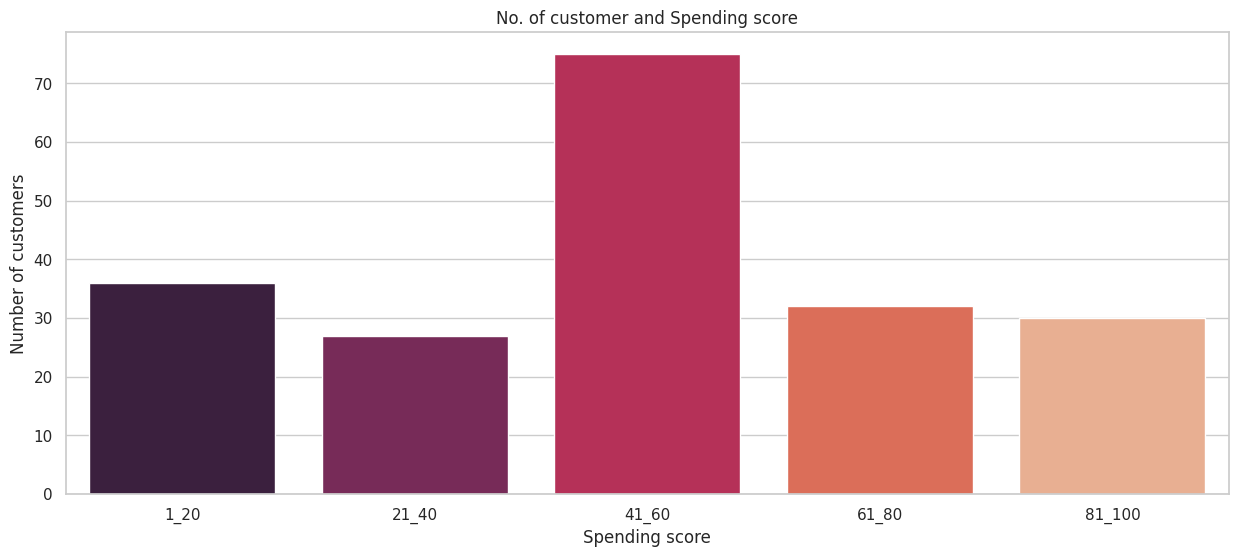

In [ ]:
#dividing data into different spending categories
ss_1_20=df['Spending Score (1-100)'][(df['Spending Score (1-100)'] >=1)&(df['Spending Score (1-100)'] <=20)]
ss_21_40=df["Spending Score (1-100)"][(df['Spending Score (1-100)'] >=21)&(df['Spending Score (1-100)'] <=40)]
ss_41_60=df["Spending Score (1-100)"][(df['Spending Score (1-100)'] >=41)&(df['Spending Score (1-100)'] <=60)]
ss_61_80=df["Spending Score (1-100)"][(df['Spending Score (1-100)'] >=61)&(df['Spending Score (1-100)'] <=80)]
ss_81_100=df["Spending Score (1-100)"][(df['Spending Score (1-100)'] >=81)&(df['Spending Score (1-100)'] <=100)]

ssx=['1_20','21_40','41_60','61_80','81_100']
ssy=[len(ss_1_20.values),len(ss_21_40.values),len(ss_41_60.values),len(ss_61_80.values),len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx,y=ssy,palette='rocket')
plt.xlabel('Spending score')
plt.ylabel('Number of customers')
plt.title('No. of customer and Spending score')
plt.show()

<ipython-input-12-0cb192b0fc4d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aix,y=aiy,palette='Spectral')


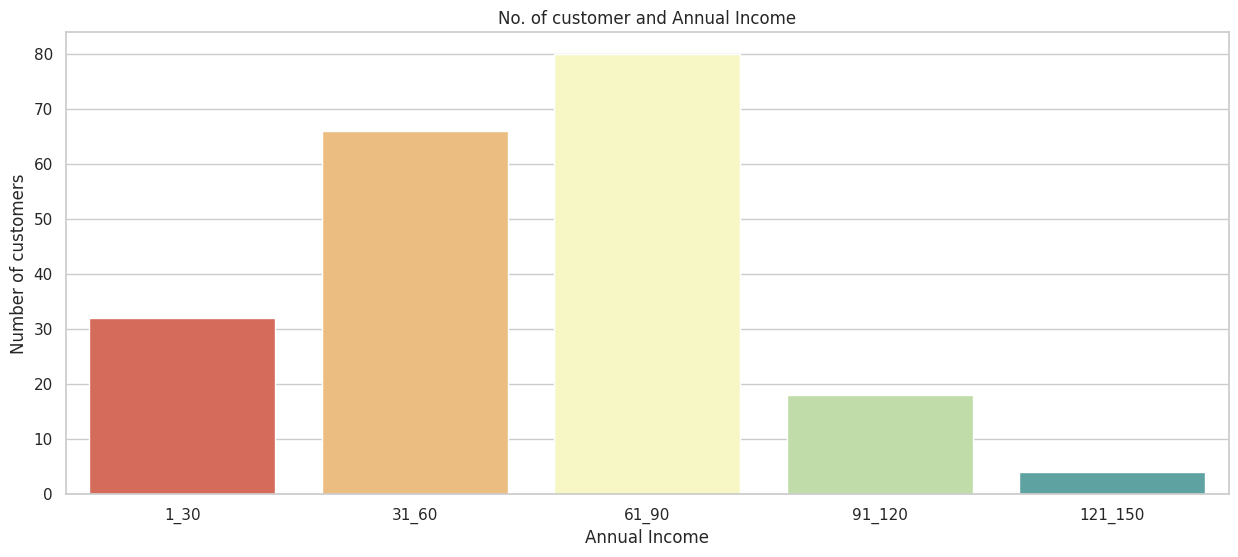

In [ ]:
#dividing data into different income categories
ai_1_30=df['Annual Income (k$)'][(df['Annual Income (k$)']>=1)&(df['Annual Income (k$)'] <=30)]
ai_31_60=df["Annual Income (k$)"][(df['Annual Income (k$)'] >=31)&(df['Annual Income (k$)'] <=60)]
ai_61_90=df["Annual Income (k$)"][(df['Annual Income (k$)'] >=61)&(df['Annual Income (k$)'] <=90)]
ai_91_120=df["Annual Income (k$)"][(df['Annual Income (k$)'] >=91)&(df['Annual Income (k$)'] <=120)]
ai_121_150=df["Annual Income (k$)"][(df['Annual Income (k$)'] >=121)&(df['Annual Income (k$)'] <=150)]

aix=['1_30','31_60','61_90','91_120','121_150']
aiy=[len(ai_1_30.values),len(ai_31_60.values),len(ai_61_90.values),len(ai_91_120.values),len(ai_121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix,y=aiy,palette='Spectral')
plt.xlabel('Annual Income')
plt.ylabel('Number of customers')
plt.title('No. of customer and Annual Income')
plt.show()

## Choosing the no of clusters with different variable combinations

### Considering Age and Spending score

In [ ]:
X=df.loc[:,['Age','Spending Score (1-100)']].values
X

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [ ]:
#finding WCSS values (within clusters sum of squares)
wcss=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

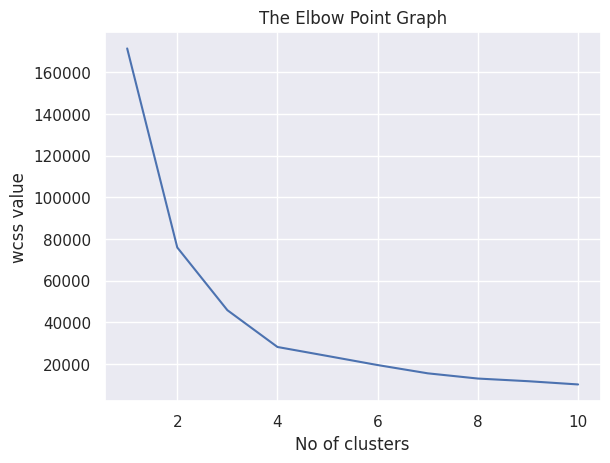

In [ ]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('No of clusters')
plt.ylabel('wcss value')
plt.show()

Optimum number of clusters=4

In [ ]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
kmeans.fit(X)

#return label for each data point based on their cluster
Y=kmeans.fit_predict(X)
print(Y)


[2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 2 2 0 1 2 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0
 1 0 1 3 1 3 2 0 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 2 2 2 2 3 3 3 3 2 2 2 1 2 1 3 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 3 1
 0 1 0 1 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [55.70833333 48.22916667]]


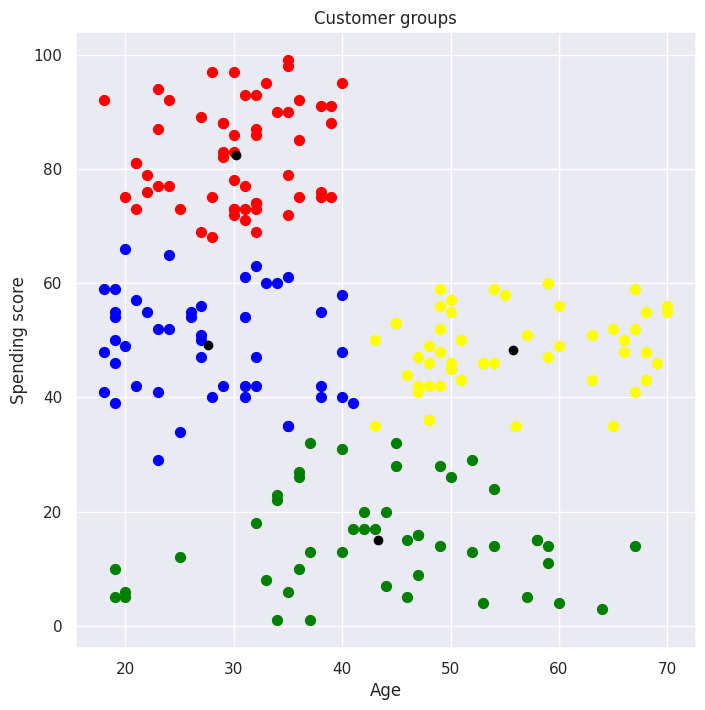

In [ ]:
#plotting the clusters
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='blue',label='Cluster 3')
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='yellow',label='Cluster 4')


plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='black',label="centroids")
plt.title("Customer groups")
plt.xlabel("Age")
plt.ylabel("Spending score")
plt.show()

### Considering Annual Income and Spending Score

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

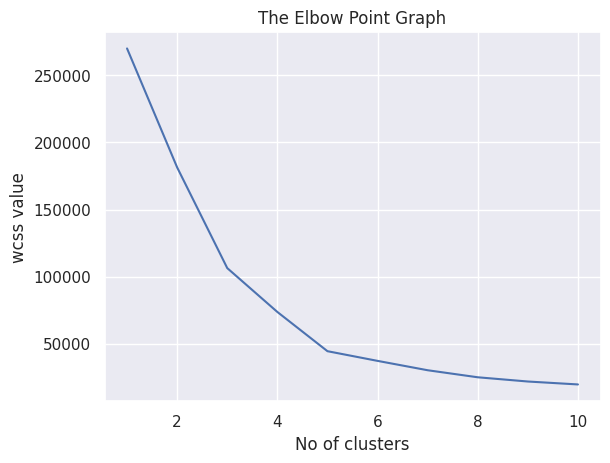

In [ ]:
X1=df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

wcss=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X1)

  wcss.append(kmeans.inertia_)

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('No of clusters')
plt.ylabel('wcss value')
plt.show()

optimum no of clusters= 5

In [ ]:
kmeans1=KMeans(n_clusters=5,init='k-means++',random_state=0)
kmeans1.fit(X1)

#return label for each data point based on their cluster
Y1=kmeans1.fit_predict(X1)
print(Y1)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(kmeans1.cluster_centers_)

[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


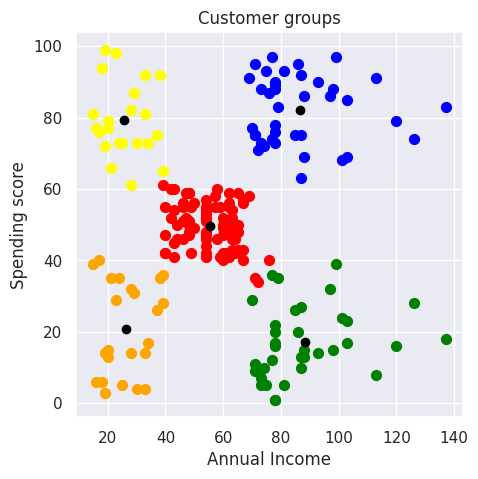

In [ ]:
#plotting the clusters
plt.figure(figsize=(5,5))
plt.scatter(X1[Y1==0,0],X1[Y1==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X1[Y1==1,0],X1[Y1==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X1[Y1==2,0],X1[Y1==2,1],s=50,c='blue',label='Cluster 3')
plt.scatter(X1[Y1==3,0],X1[Y1==3,1],s=50,c='yellow',label='Cluster 4')
plt.scatter(X1[Y1==4,0],X1[Y1==4,1],s=50,c='orange',label='Cluster 5')


plt.scatter(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1],c='black',label="centroids")
plt.title("Customer groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.show()

### Considering All three variables Age, Annual Income & Spending score

---



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

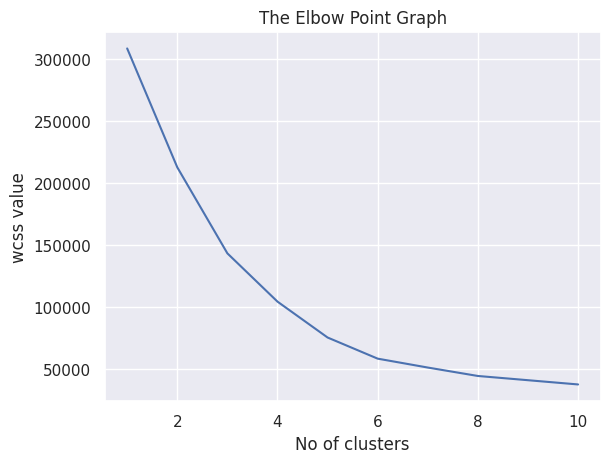

In [ ]:
X2=df.loc[:,['Age','Annual Income (k$)','Spending Score (1-100)']].values

wcss=[]
for i in range (1,11):
  kmeans2=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans2.fit(X2)

  wcss.append(kmeans2.inertia_)

sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('No of clusters')
plt.ylabel('wcss value')
plt.show()

optimum no of clusters =5

In [ ]:
kmeans2=KMeans(n_clusters=5,init='k-means++',random_state=0)
kmeans2.fit(X2)

#return label for each data point based on their cluster
Y2=kmeans2.fit_predict(X2)
print(Y2)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(kmeans2.cluster_centers_)

[[45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [43.08860759 55.29113924 49.56962025]
 [40.66666667 87.75       17.58333333]
 [25.52173913 26.30434783 78.56521739]]


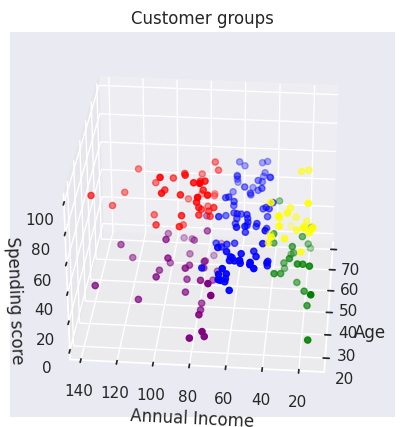

In [ ]:
#plotting the clusters
df['label']=Y2

from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.Age[df.label==0],df['Annual Income (k$)'][df.label==0],df['Spending Score (1-100)'][df.label==0],c='green',label='Cluster 1')
ax.scatter(df.Age[df.label==1],df['Annual Income (k$)'][df.label==1],df['Spending Score (1-100)'][df.label==1],c='red',label='Cluster 2')
ax.scatter(df.Age[df.label==2],df['Annual Income (k$)'][df.label==2],df['Spending Score (1-100)'][df.label==2],c='blue',label='Cluster 3')
ax.scatter(df.Age[df.label==3],df['Annual Income (k$)'][df.label==3],df['Spending Score (1-100)'][df.label==3],c='purple',label='Cluster 4')
ax.scatter(df.Age[df.label==4],df['Annual Income (k$)'][df.label==4],df['Spending Score (1-100)'][df.label==4],c='yellow',label='Cluster 15')

ax.view_init(30,185)
#plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],c='black',label="centroids")
plt.title("Customer groups")
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel("Spending score")
plt.show()